In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.optimize import curve_fit
from lmfit import Model


In [9]:
dataframe = pd.read_excel('./WaterResources.xlsx')
series_codes = dataframe['Series Code'].unique()
series_names = dataframe['Series Name'].unique()

for i, j in zip(series_names, series_codes):
    print('\n{:^10} : {:^10}'.format(i, j))


Agricultural land (% of land area) : AG.LND.AGRI.ZS

Forest area (% of land area) : AG.LND.FRST.ZS

Average precipitation in depth (mm per year) : AG.LND.PRCP.MM

Population growth (annual %) : SP.POP.GROW

Urban population growth (annual %) : SP.URB.GROW

Electricity production from hydroelectric sources (% of total) : EG.ELC.HYRO.ZS

CO2 emissions (metric tons per capita) : EN.ATM.CO2E.PC

Agricultural irrigated land (% of total agricultural land) : AG.LND.IRIG.AG.ZS

Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal) : ER.H2O.FWAG.ZS

Rural population growth (annual %) : SP.RUR.TOTL.ZG

Annual freshwater withdrawals, total (% of internal resources) : ER.H2O.FWTL.ZS

Level of water stress: freshwater withdrawal as a proportion of available freshwater resources : ER.H2O.FWST.ZS

People using at least basic drinking water services (% of population) : SH.H2O.BASW.ZS

Renewable internal freshwater resources, total (billion cubic meters) : ER.H2O.INTR.K3

Peopl

In [161]:
df_melted = pd.melt(dataframe, id_vars=['Country Code', 'Country Name', 'Series Name', 'Series Code'], var_name='Year', value_name='Value')
test = df_melted.drop(['Country Name', 'Series Name'], axis=1)
test = test.dropna()
test = test.pivot(index=['Country Code', 'Year'], columns='Series Code', values='Value')
test = test.groupby('Country Code').mean()

<ipython-input-161-3468d4117139>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  test = test.pivot(index=['Country Code', 'Year'], columns='Series Code', values='Value')


Series Code,AG.LND.AGRI.ZS,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,EG.ELC.HYRO.ZS,EN.ATM.CO2E.PC,ER.H2O.FWAG.ZS,ER.H2O.FWST.ZS,ER.H2O.FWTL.ZS,ER.H2O.INTR.K3,SH.H2O.BASW.ZS,SH.H2O.SMDW.ZS,SH.STA.HYGN.ZS,SP.POP.GROW,SP.RUR.TOTL.ZG,SP.URB.GROW
Country Code,,,,,,,,,,,,,,,,
ABW,11.111111,2.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.895861,1.171518,0.561707
AFG,58.154255,1.852782,5.723223,327.0,NaN,0.211640,98.213207,54.757019,43.015907,47.1500,50.839476,19.751541,NaN,3.451165,3.191192,4.273737
AGO,36.120518,57.656587,NaN,1010.0,67.341581,0.903273,21.938532,1.854562,0.472412,148.0000,50.542284,NaN,NaN,3.562446,1.520022,5.004025
ALB,42.389429,28.539635,NaN,1485.0,NaN,1.543530,54.626914,7.337800,4.539071,26.9000,91.369665,61.779944,NaN,-0.424049,-2.575370,1.563228
AND,43.183128,34.042553,NaN,NaN,NaN,6.840185,NaN,NaN,NaN,0.3156,99.999999,90.640001,NaN,0.808659,3.123577,0.560250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,2.087356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258308,NaN,NaN
YEM,44.525068,1.039832,NaN,167.0,0.000000,0.780591,90.670413,168.900000,168.900000,2.1000,50.877926,NaN,NaN,2.749349,1.890183,4.583592
ZAF,79.848486,14.340148,NaN,495.0,0.605343,7.690738,61.370831,50.784022,35.401451,44.8000,89.686826,NaN,NaN,1.140040,-0.250007,1.984166


In [11]:
test.isna().sum()

Series Code
AG.LND.AGRI.ZS        10
AG.LND.FRST.ZS         9
AG.LND.IRIG.AG.ZS    205
AG.LND.PRCP.MM        37
EG.ELC.HYRO.ZS        80
EN.ATM.CO2E.PC        26
ER.H2O.FWAG.ZS        61
ER.H2O.FWST.ZS        59
ER.H2O.FWTL.ZS        60
ER.H2O.INTR.K3        37
SH.H2O.BASW.ZS        26
SH.H2O.SMDW.ZS        86
SH.STA.HYGN.ZS       209
SP.POP.GROW            0
SP.RUR.TOTL.ZG        12
SP.URB.GROW            2
dtype: int64

In [12]:
test.drop(['AG.LND.IRIG.AG.ZS', 'SH.STA.HYGN.ZS'], axis=1, inplace=True)

In [13]:
test.dropna(inplace=True)

In [18]:
# Creating subsets for Analysis
popXstress = test[['SP.POP.GROW', 'ER.H2O.FWST.ZS']]
agroXwithdrawl = test[['AG.LND.AGRI.ZS', 'ER.H2O.FWTL.ZS']]
stressXprecip = test[['AG.LND.PRCP.MM', 'ER.H2O.FWST.ZS']]

In [15]:
scaler = StandardScaler()
feats_scaled = scaler.fit_transform(popXstress)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init=10)
test['pxs_cluster'] = kmeans.fit_predict(feats_scaled)

In [16]:
feats_scaled = scaler.fit_transform(agroXwithdrawl)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init=10)
test['axw_cluster'] = kmeans.fit_predict(feats_scaled)

In [19]:
feats_scaled = scaler.fit_transform(stressXprecip)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, n_init=10)
test['sXp_cluster'] = kmeans.fit_predict(feats_scaled)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


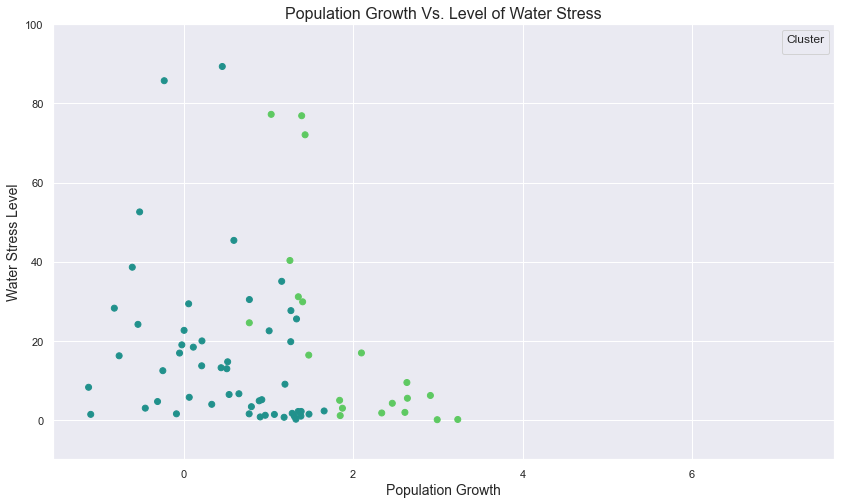

In [32]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    x=test['SP.POP.GROW'],
    y=test['ER.H2O.FWTL.ZS'],
    c=test['pxs_cluster'],
    cmap='viridis',
    vmin=-1,
    vmax=3
)


plt.title('Population Growth Vs. Level of Water Stress', fontsize=16)
plt.xlabel('Population Growth', fontsize=14)
plt.ylabel('Water Stress Level', fontsize=14)
plt.ylim(-10, 100)


legend = ax.legend(title='Cluster', loc='upper right')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


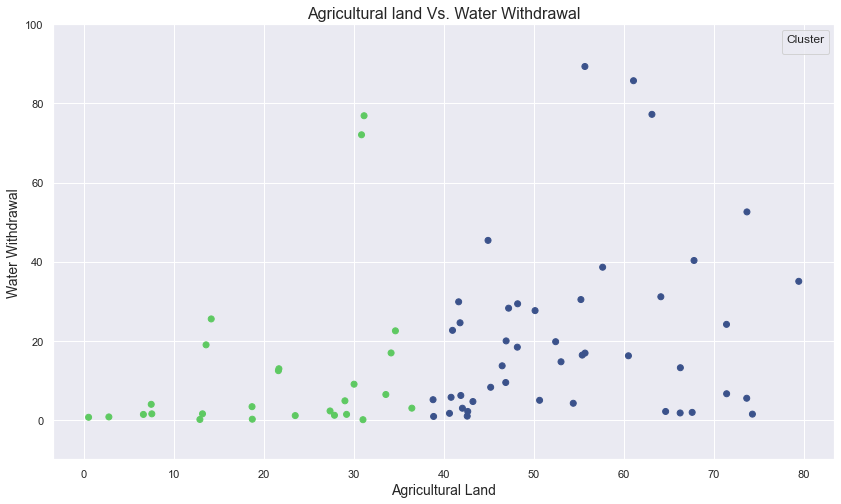

In [34]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    x=test['AG.LND.AGRI.ZS'],
    y=test['ER.H2O.FWTL.ZS'],
    c=test['axw_cluster'],
    cmap='viridis',
    vmin=-1,
    vmax=3,
)


plt.title('Agricultural land Vs. Water Withdrawal', fontsize=16)
plt.xlabel('Agricultural Land', fontsize=14)
plt.ylabel('Water Withdrawal', fontsize=14)
plt.ylim(-10, 100)

legend = ax.legend(title='Cluster', loc='upper right')

plt.show()

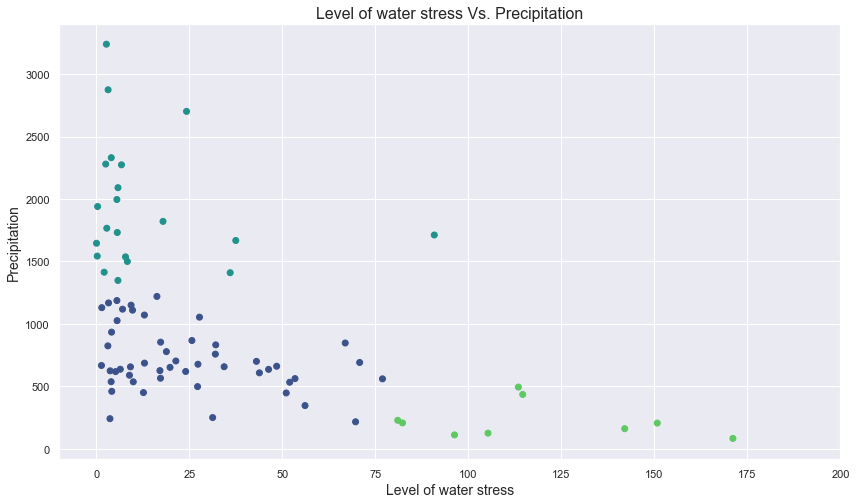

In [50]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(figsize=(14, 8))

ax.scatter(
    x=test['ER.H2O.FWST.ZS'],
    y=test['AG.LND.PRCP.MM'],
    c=test['sXp_cluster'],
    cmap='viridis',
    vmin=-1,
    vmax=3
)


plt.title('Level of water stress Vs. Precipitation', fontsize=16)
plt.xlabel('Level of water stress', fontsize=14)
plt.ylabel('Precipitation', fontsize=14)
plt.xlim(-10,200)


plt.show()

In [162]:
# Acquiring a subset which includes countries with high water stress & low precipitation.
subset = test[(test['ER.H2O.FWST.ZS'] > 75) & (test['AG.LND.PRCP.MM'] < 1000)]

trend_set = pd.merge(df_melted, subset, on='Country Code', how='inner')


,Country Code,Country Name,Series Name,Series Code,Year,Value,AG.LND.AGRI.ZS,AG.LND.FRST.ZS,AG.LND.IRIG.AG.ZS,AG.LND.PRCP.MM,...,ER.H2O.FWAG.ZS,ER.H2O.FWST.ZS,ER.H2O.FWTL.ZS,ER.H2O.INTR.K3,SH.H2O.BASW.ZS,SH.H2O.SMDW.ZS,SH.STA.HYGN.ZS,SP.POP.GROW,SP.RUR.TOTL.ZG,SP.URB.GROW
0,DZA,Algeria,Agricultural land (% of land area),AG.LND.AGRI.ZS,2001,16.840209,17.266644,0.778328,NaN,89.0,...,61.299724,109.848037,69.413177,11.247,92.365979,74.196776,NaN,1.724794,-0.388151,2.762078
1,DZA,Algeria,Forest area (% of land area),AG.LND.FRST.ZS,2001,0.677194,17.266644,0.778328,NaN,89.0,...,61.299724,109.848037,69.413177,11.247,92.365979,74.196776,NaN,1.724794,-0.388151,2.762078
2,DZA,Algeria,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,2001,89.000000,17.266644,0.778328,NaN,89.0,...,61.299724,109.848037,69.413177,11.247,92.365979,74.196776,NaN,1.724794,-0.388151,2.762078
3,DZA,Algeria,Population growth (annual %),SP.POP.GROW,2001,1.375931,17.266644,0.778328,NaN,89.0,...,61.299724,109.848037,69.413177,11.247,92.365979,74.196776,NaN,1.724794,-0.388151,2.762078
4,DZA,Algeria,Urban population growth (annual %),SP.URB.GROW,2001,2.690704,17.266644,0.778328,NaN,89.0,...,61.299724,109.848037,69.413177,11.247,92.365979,74.196776,NaN,1.724794,-0.388151,2.762078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,YEM,"Yemen, Rep.",Rural population growth (annual %),SP.RUR.TOTL.ZG,2020,1.292965,44.525068,1.039832,NaN,167.0,...,90.670413,168.900000,168.900000,2.100,50.877926,NaN,NaN,2.749349,1.890183,4.583592
5436,YEM,"Yemen, Rep.","Annual freshwater withdrawals, total (% of int...",ER.H2O.FWTL.ZS,2020,169.761905,44.525068,1.039832,NaN,167.0,...,90.670413,168.900000,168.900000,2.100,50.877926,NaN,NaN,2.749349,1.890183,4.583592
5437,YEM,"Yemen, Rep.",Level of water stress: freshwater withdrawal a...,ER.H2O.FWST.ZS,2020,169.761905,44.525068,1.039832,NaN,167.0,...,90.670413,168.900000,168.900000,2.100,50.877926,NaN,NaN,2.749349,1.890183,4.583592
5438,YEM,"Yemen, Rep.",People using at least basic drinking water ser...,SH.H2O.BASW.ZS,2020,60.663572,44.525068,1.039832,NaN,167.0,...,90.670413,168.900000,168.900000,2.100,50.877926,NaN,NaN,2.749349,1.890183,4.583592


In [61]:
trend_set['Country Code'].nunique()

11

In [217]:
trend_set = trend_set[['Country Name', 'Country Code', 'Series Code', 'Series Name', 'Year', 'Value']]
water_stress = trend_set[trend_set['Series Code'] == 'ER.H2O.FWST.ZS']
water_stress = water_stress.pivot(index='Country Code', columns='Year', values='Value')
water_stress

<ipython-input-217-9abf5922eba0>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  water_stress = water_stress.pivot(index='Country Code', columns='Year', values='Value')


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,
ARE,1527.928889,1499.991111,1472.053333,1669.360000,1866.666667,1849.636364,1832.606061,1815.575758,1798.545455,1781.515152,1764.484848,1747.454545,1730.424242,1713.393939,1696.363636,1679.333333,1630.000000,1667.333333,1628.666667,1587.333333
BHR,234.762378,220.613948,205.775862,201.105016,196.434169,191.763323,187.092476,182.421630,177.750784,173.079937,168.409091,163.738245,159.067398,154.396552,137.155172,133.706897,133.706897,133.706897,133.706897,133.706897
DZA,81.710520,85.037372,87.522801,90.008229,92.493658,94.979086,97.464514,99.949943,102.435371,104.920799,107.406228,109.750950,115.163454,120.575958,125.988462,129.871957,137.920360,137.920360,137.920360,137.920360
EGY,106.934426,109.989071,113.043716,116.098361,119.153005,122.207650,125.262295,128.316940,131.371585,134.426230,130.510018,131.693989,132.969035,110.564663,110.928962,110.473588,141.165756,141.165756,141.165756,141.165756
IRN,78.401111,79.407495,80.413879,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081,81.289081
ISR,136.178932,133.163661,148.390993,122.422569,121.286630,120.150692,119.014753,117.878814,116.742875,115.606936,112.259512,108.912087,105.512898,102.148218,98.869813,103.442326,103.614874,95.936502,100.422742,110.085411
JOR,77.318323,81.810199,82.314922,88.911128,95.935320,101.561635,103.222948,102.779931,95.580906,98.903533,88.160372,94.030347,99.789567,107.409458,96.156828,100.077528,100.443017,102.226160,104.312770,104.312770
KWT,1993.423611,2075.000000,2176.846154,2278.692308,2380.538462,2482.384615,2584.230769,2686.076923,2787.923077,2889.769231,2991.615385,3093.461538,3195.307692,3297.153846,3399.000000,3575.000000,3850.500000,3850.500000,3850.500000,3850.500000
LBY,631.957143,648.485714,665.014286,681.542857,698.071429,715.081633,732.091837,749.102041,766.112245,783.122449,800.132653,817.142857,817.142857,817.142857,817.142857,817.142857,817.142857,817.142857,817.142857,817.142857


In [455]:
trend_set = trend_set[['Country Name', 'Country Code', 'Series Code', 'Series Name', 'Year', 'Value']]
co2_emissions = trend_set[trend_set['Series Code'] == 'EN.ATM.CO2E.PC']
co2_emissions = co2_emissions.pivot(index='Country Code', columns='Year', values='Value')
co2_emissions

<ipython-input-455-b498f9716fa1>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  co2_emissions = co2_emissions.pivot(index='Country Code', columns='Year', values='Value')


Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,
ARE,28.138659,27.285557,27.224873,27.547774,27.202544,24.813970,22.448500,22.328149,19.645539,19.192796,19.431780,20.275652,21.133916,21.122774,21.914502,22.280703,21.165498,19.060950,20.153345,20.252272
BHR,22.439114,23.013401,23.056822,21.509723,22.944027,23.157405,22.105039,22.301397,20.956409,21.394807,21.465303,22.184125,22.868842,23.096571,22.385625,21.495310,20.946038,20.737962,22.063355,21.976908
DZA,2.520610,2.605695,2.751099,2.752759,2.857927,2.985149,3.023503,3.116771,3.187069,3.184357,3.305233,3.621368,3.658469,3.811521,3.951961,3.833834,3.833681,3.924299,3.994402,3.718223
EGY,1.739149,1.739947,1.751114,1.864027,2.051425,2.117645,2.230582,2.265319,2.311790,2.295791,2.306807,2.356423,2.290225,2.292246,2.315542,2.359353,2.402416,2.294016,2.063161,1.961123
IRN,5.310374,5.493712,5.735837,6.047644,6.423184,6.793040,7.109333,7.133930,7.296522,7.179825,7.231195,7.230858,7.439601,7.570578,7.325792,7.288966,7.412903,7.445128,7.222980,7.063351
ISR,9.000233,9.296895,9.406326,9.275944,8.803971,9.120178,9.275344,9.127080,8.780552,9.250262,8.991063,9.615473,8.313481,7.877332,7.913354,7.633162,7.563874,6.914993,6.935752,6.345216
JOR,3.147380,3.198445,3.207825,3.358547,3.498966,3.319371,3.257966,3.016642,3.047713,2.913872,2.919319,3.344947,3.093473,2.951377,2.665730,2.481772,2.547316,2.362363,2.163621,1.919172
KWT,26.705525,27.153745,27.656833,28.752425,31.274316,30.649794,28.163544,28.611506,27.777790,27.426380,26.493555,25.132421,23.958143,22.749990,22.775020,22.572698,21.910401,21.461230,21.135214,21.169610
LBY,8.426385,8.435402,8.828192,8.521928,9.079176,8.861063,8.101372,8.553747,8.868287,9.174324,6.707420,9.934649,9.985813,9.723089,8.289608,7.751239,8.167602,8.351625,8.325768,6.682805


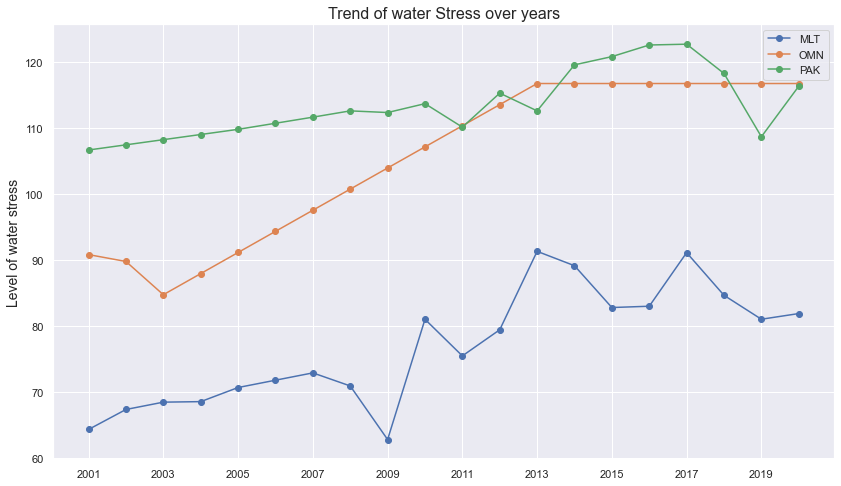

In [339]:
# Lets observe trends of countries in water stress.
sns.set(style='darkgrid')

sub_watstr = water_stress[9:12]

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(sub_watstr.T, marker='o', label=sub_watstr.index)


plt.title('Trend of water Stress over years', fontsize=16)
plt.ylabel('Level of water stress', fontsize=14)
plt.xticks(list(map(int, water_stress.columns[::2])))

plt.legend()

plt.show()


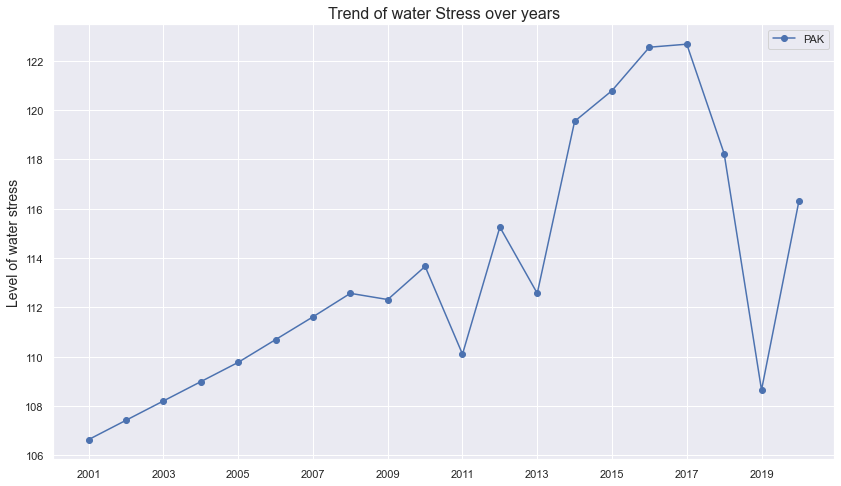

In [321]:
# Lets observe trends of countries in water stress.
sns.set(style='darkgrid')

sub_watstr = water_stress.loc['PAK']

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(sub_watstr.T, marker='o', label=sub_watstr.name)


plt.title('Trend of water Stress over years', fontsize=16)
plt.ylabel('Level of water stress', fontsize=14)
plt.xticks(list(map(int, water_stress.columns[::2])))

plt.legend()

plt.show()


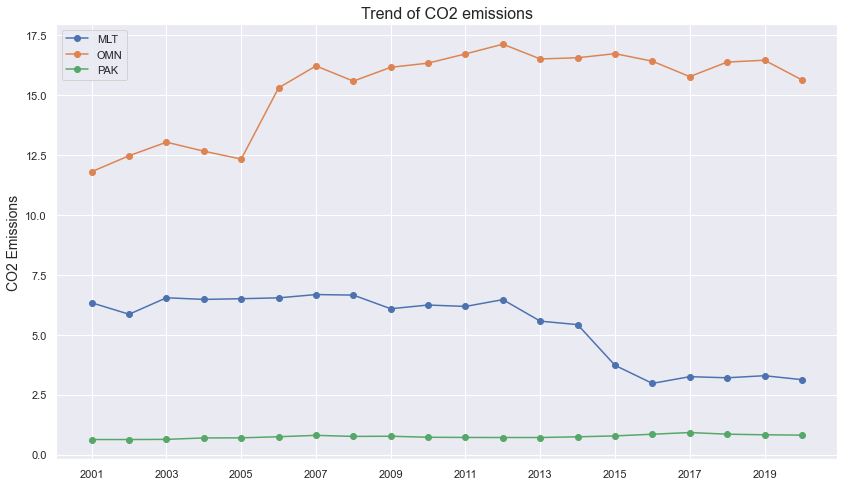

In [456]:
# Lets observe trends of countries in water stress.
sns.set(style='darkgrid')

sub_co2e = co2_emissions[9:12]

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(sub_co2e.T, marker='o', label=sub_watstr.index)


plt.title('Trend of CO2 emissions', fontsize=16)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.xticks(list(map(int, water_stress.columns[::2])))

plt.legend()

plt.show()


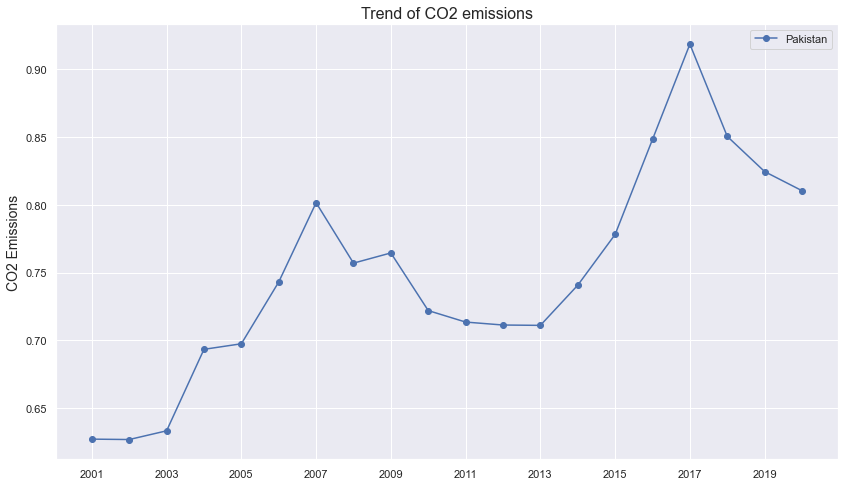

In [458]:
# Lets observe trends of countries in water stress.
sns.set(style='darkgrid')

sub_co2e = co2_emissions.loc['PAK']

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(sub_co2e.T, marker='o', label='Pakistan')


plt.title('Trend of CO2 emissions', fontsize=16)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.xticks(list(map(int, water_stress.columns[::2])))

plt.legend()

plt.show()


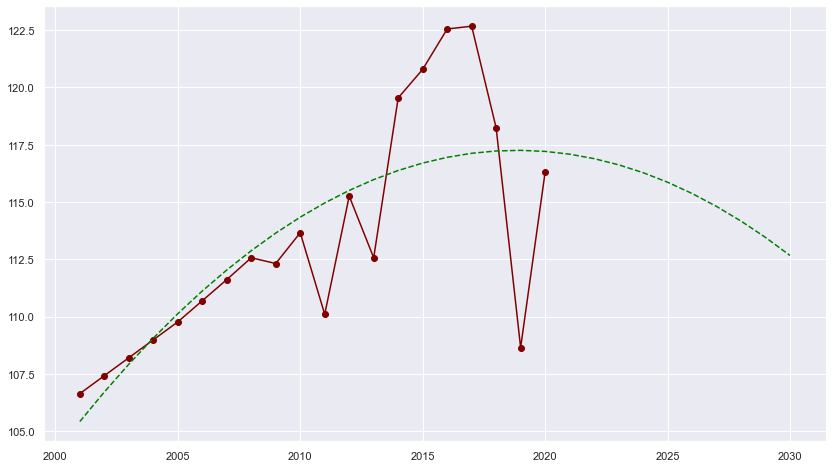

In [459]:
# Designing a curve fit model to curve_fit
def quad_func(x, a, b, c):
    return a * x**2 + b * x + c


years = water_stress.columns
prediction_years = np.arange(2001,2031)

parameters, covar_actual = curve_fit(quad_func, years, water_stress.loc['PAK'].values)

a_fit, b_fit, c_fit = parameters

predicted_values = quad_func(prediction_years, a_fit, b_fit, c_fit)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(years, water_stress.loc['PAK'].values, marker='o', label='Current', color='maroon')
ax.plot(prediction_years, predicted_values, label='Predicted', color='green', linestyle='dashed')

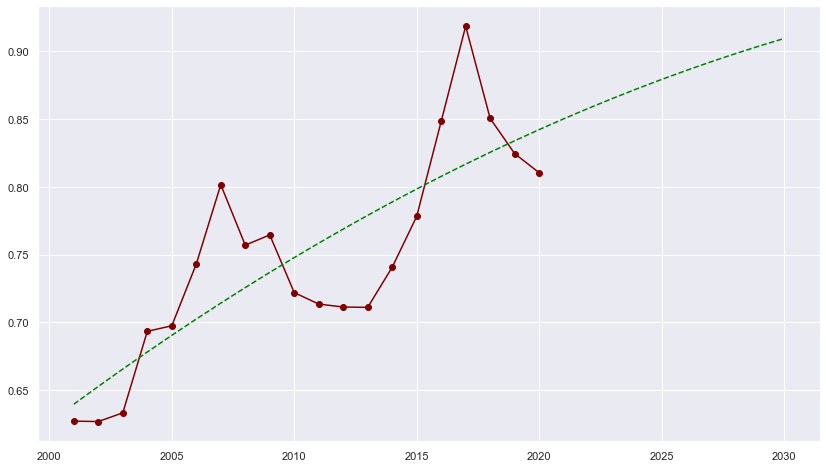

In [461]:
parameters, covar_actual = curve_fit(quad_func, years, co2_emissions.loc['PAK'].values)

a_fit, b_fit, c_fit = parameters

predicted_values = quad_func(prediction_years, a_fit, b_fit, c_fit)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(years, co2_emissions.loc['PAK'].values, marker='o', label='Current', color='maroon')
ax.plot(prediction_years, predicted_values, label='Predicted', color='green', linestyle='dashed')